### Load MNIST data using the mnist package 

In [1]:
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

### Data processing, label images of 3 as 0, and images of 7 as 1. Flatten the 2D image into 1D array.

In [2]:
import numpy as np

train_images_3 = train_images[train_labels == 3]
train_images_3 = train_images_3.reshape(train_images_3.shape[0], 28*28)
train_labels_3 = np.zeros(train_images_3.shape[0])
train_images_7 = train_images[train_labels == 7]
train_images_7 = train_images_7.reshape(train_images_7.shape[0], 28*28)
train_labels_7 = np.ones(train_images_7.shape[0])
X_train = np.concatenate((train_images_3, train_images_7), axis=0)
Y_train = np.concatenate((train_labels_3, train_labels_7), axis=0)

test_images_3 = test_images[test_labels == 3]
test_images_3 = test_images_3.reshape(test_images_3.shape[0], 28*28)
test_labels_3 = np.zeros(test_images_3.shape[0])
test_images_7 = test_images[test_labels == 7]
test_images_7 = test_images_7.reshape(test_images_7.shape[0], 28*28)
test_labels_7 = np.ones(test_images_7.shape[0])
X_test = np.concatenate((test_images_3, test_images_7), axis=0)
Y_test = np.concatenate((test_labels_3, test_labels_7), axis=0)


print ("Train set data shape:")
print ("X:", X_train.shape)
print ("Y:", Y_train.shape)
print ("Test set data shape:")
print ("X:", X_test.shape)
print ("Y:", Y_test.shape)

Train set data shape:
X: (12396, 784)
Y: (12396,)
Test set data shape:
X: (2038, 784)
Y: (2038,)


### Plot some sample data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 12395 + 1) instead
  after removing the cwd from sys.path.


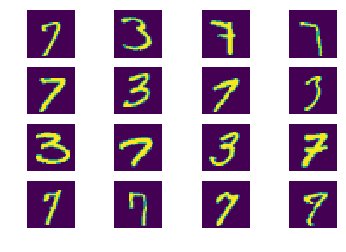

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

samples = np.random.random_integers(0, X_train.shape[0]-1, size=16)
count = 1
for sample in samples:
    plt.subplot(4,4, count)
    plt.axis('off')
    plt.imshow(X_train[sample].reshape(28,28))
    count += 1

### Linear kernel implementation

In [4]:
from sklearn import svm
import time

linear_svc = svm.SVC(kernel='linear')
start_time = time.time()
linear_svc.fit(X_train, Y_train)
end_time = time.time()

print ("Training time is:", end_time-start_time)
print ("Accuracy score is:", linear_svc.score(X_test, Y_test))

Training time is: 12.602896928787231
Accuracy score is: 0.9764474975466143


### Poly kernel implementation

In [5]:
from sklearn import svm

poly_svc = svm.SVC(kernel='poly')
start_time = time.time()
poly_svc.fit(X_train, Y_train)
end_time = time.time()

print ("Training time is:", end_time-start_time)
print ("Accuracy score is:", poly_svc.score(X_test, Y_test))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training time is: 7.354567050933838
Accuracy score is: 0.9955839057899902


### RBF kernel implementation

In [6]:
from sklearn import svm

rbf_svc = svm.SVC(kernel='rbf')
start_time = time.time()
rbf_svc.fit(X_train, Y_train)
end_time = time.time()

print ("Training time is:", end_time-start_time)
print ("Accuracy score is:", rbf_svc.score(X_test, Y_test))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training time is: 452.00220489501953
Accuracy score is: 0.5044160942100098
